In [ ]:
import pickle
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
class DataLoader:
    def __init__(self):
        self.train, self.valid, self.test = self.load_data()

    def load_data(self):
        """Load MNIST train, validation, and test data."""
        # For notebooks, use relative path to parent directory
        data_path = '../mnist.pkl'
        with open(data_path, 'rb') as f:
            train, valid, test = pickle.load(f, encoding='latin-1')
        return train, valid, test
    
    def get_data_information(self):
        """Return the shape of the datasets, their data types, unique labels and data range."""
        return {
            'train': (self.train[0].shape, self.train[1].shape),
            'train_data_type': type(self.train[0]),
            'valid': (self.valid[0].shape, self.valid[1].shape),
            'valid_data_type': type(self.valid[0]),
            'test': (self.test[0].shape, self.test[1].shape),
            'test_data_type': type(self.test[0]),
            'unique_labels': set(self.train[1]),
            'training_data_range': (self.train[0].min(), self.train[0].max())
        }
    
    def get_train_data(self):
        """Return training data and labels."""
        return self.train

    def get_valid_data(self):
        """Return validation data and labels."""
        return self.valid

    def get_test_data(self):
        """Return test data and labels."""
        return self.test
    
    def get_all_data(self):
        """Return all datasets."""
        return self.train, self.valid, self.test
    
    def print_data_summary(self):
        """Print a summary of the datasets."""
        info = self.get_data_information()
        print("Data Summary:")
        print(f"Training set: {info['train'][0]} samples, Labels: {info['train'][1]}")
        print(f"Validation set: {info['valid'][0]} samples, Labels: {info['valid'][1]}")
        print(f"Test set: {info['test'][0]} samples, Labels: {info['test'][1]}")
        print(f"Unique labels in training set: {info['unique_labels']}")
        print(f"Training data range: {info['training_data_range']}")
    
    def draw_sample(self, data, labels, index=None):
        """Draw a sample image from the dataset.
        
        Args:
            data: Image data array (samples, height, width) or (samples, pixels)
            labels: Label array
            index: Index of image to draw (random if None)
        """
        if index is None:
            index = np.random.randint(0, len(data))
        
        image = data[index]
        label = labels[index]
        
        # Reshape if flattened (784 pixels -> 28x28)
        if len(image.shape) == 1:
            image = image.reshape(28, 28)
        
        plt.figure(figsize=(6, 6))
        plt.imshow(image, cmap='gray')
        plt.title(f'Label: {label}')
        plt.axis('off')
        plt.show()

# Data example

Data Summary:
Training set: (50000, 784) samples, Labels: (50000,)
Validation set: (10000, 784) samples, Labels: (10000,)
Test set: (10000, 784) samples, Labels: (10000,)
Unique labels in training set: {np.int64(0), np.int64(1), np.int64(2), np.int64(3), np.int64(4), np.int64(5), np.int64(6), np.int64(7), np.int64(8), np.int64(9)}
Training data range: (np.float32(0.0), np.float32(0.99609375))


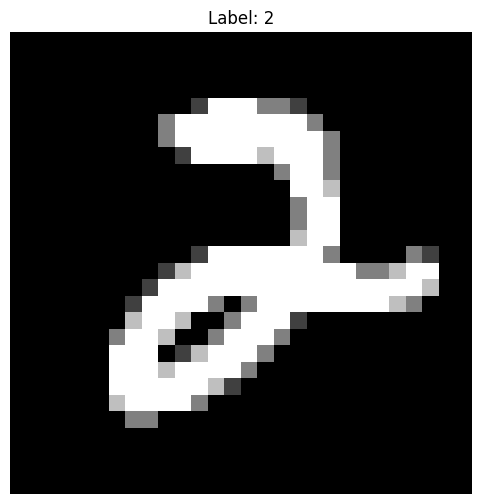

In [ ]:
# Test the DataLoader
loader = DataLoader()
loader.print_data_summary()
train_data, train_labels = loader.get_train_data()
loader.draw_sample(train_data, train_labels)

In [ ]:
class Layer:
    def __init__(self, input: int, output: int, a_function):
        self._weights = np.random.rand(output, input)
        self._bias = np.random.rand(output, 1)
        self._activation = a_function

    def forward(self, input: np.ndarray):
        a = self._weights @ input+self._bias
        o = self._activation(a)
        return o
    def __str__(self):
        return f"Layer of {len(self._weights)} neurons"


class NeuralNetwork:
    def __init__(
        self,
        input_size: int,
        hidden_sizes: list,
        output_size: int,
        activation_function,
        final_activation=True,
    ):
        if not isinstance(activation_function, list):
            activation_function=[activation_function for _ in range(len(hidden_sizes)+2)]
        sizes=[input_size]+hidden_sizes+[output_size]
        self._layers=[]
        for i in range(len(sizes)-1):
            self._layers.append(Layer(sizes[i], sizes[i+1], activation_function[i]))

    def forward(self, x):
        z = self._layers[0].forward(x)
        for i in range(1, len(self._layers)):
            z = self._layers[i].forward(z)
        return z
        # """
        # X: input with shape (input_size, batch_size) ← mini-batch
        # Output: y_hat with shape (output_size, batch_size)
        # """
        # # 1) Add bias neuron to input layer: (input_size+1, batch_size)
        # Xb = self._append_bias_row(X)

        # # 2) Pre-activation of hidden layer: z1 = W1 · Xb
        # z1 = self.W1 @ Xb

        # # 3) Hidden layer activation: a1 = sigmoid(z1) → (hidden_size, batch_size)
        # a1 = self.sigmoid(z1)

        # # 4) Add bias neuron to a1: (hidden_size+1, batch_size)
        # a1b = self._append_bias_row(a1)

        # # 5) Pre-activation of output layer: z2 = W2 · a1b
        # z2 = self.W2 @ a1b

        # # 6) Output activation: a2 = sigmoid(z2) → (output_size, batch_size)
        # a2 = self.sigmoid(z2)

        # # Save for backpropagation
        # self.cache = {
        #     "X": X, "Xb": Xb,
        #     "z1": z1, "a1": a1, "a1b": a1b,
        #     "z2": z2, "a2": a2
        # }
        # return a2

## Test

In [ ]:
input_size, hidden_size, output_size = 784, 30, 10
B = 16  # batch size

nn = NeuralNetwork(784, [30], 10, np.sin)  # ← مقیاس خارج از منابع
print(nn.forward(np.random.rand(784, 1)))
print(nn.forward(np.random.rand(784, 10))) #seems to work



[[-0.95532288]
 [-0.42093227]
 [-0.20349792]
 [-0.81083174]
 [-0.87235776]
 [-0.30812798]
 [ 0.92433168]
 [-0.97429069]
 [ 0.99948213]
 [ 0.46790707]]
[[ 0.99895829 -0.97024588  0.95322357 -0.98609469 -0.64859183  0.99831752
   0.45412877 -0.70005027 -0.72208131  0.34457931]
 [ 0.99765983  0.57349206  0.15735826 -0.68470696 -0.99938447  0.89559478
   0.97860336  0.55534689 -0.05331321  0.16210834]
 [ 0.76838604 -0.11969727 -0.08978427 -0.83030519 -0.08286167 -0.81564909
   0.92143629  0.25000883  0.90203579  0.76704666]
 [-0.97580648  0.42907293 -0.76685355  0.10641305 -0.53946174  0.11725587
   0.40701228  0.84448515  0.09824011  0.93094159]
 [ 0.98500047 -0.05913097 -0.19019918  0.60905772 -0.97462232  0.51927884
   0.12602272 -0.80150031 -0.97627526  0.92737517]
 [ 0.99252796 -0.52726814  0.89908762  0.89219433 -0.54756174  0.53948613
   0.63569933  0.24797926 -0.99999371  0.76199531]
 [ 0.76535854  0.4474374  -0.10911285  0.42924518  0.54111399  0.71304532
   0.97266845  0.72975971